In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
dfx = pd.read_csv('Linear_X_Train.csv')
dfy = pd.read_csv('Linear_Y_Train.csv')
dfz = pd.read_csv('Linear_X_Test.csv')
x = dfx.values
y = dfy.values
z = dfz.values
print(x.shape)
print(y.shape)
print(z.shape)

(3750, 1)
(3750, 1)
(1250, 1)


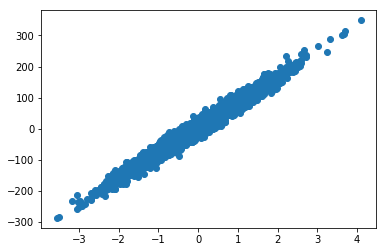

In [142]:
plt.scatter(x,y)
plt.show()

In [148]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x
def error(x, y, theta):
    m = x.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(x, theta)
        error += (hx - y[i])**2
    return error
def gradient(x, y, theta):
    grad = np.zeros((2, ))
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i], theta)
        grad[0] += (hx-y[i])
        grad[1] += (hx-y[i])*x[i]
    return grad
def gradientdescent(x, y, lr = -0.0002):
    theta = np.zeros((2, ))
    itr = 0
    max_itr = 300
    error_list = []
    while(itr < max_itr):
        grad = gradient(x, y, theta)
        e = error(x, y, theta)
        error_list.append(e)
        theta[0] = theta[0] + lr*grad[0]
        theta[1] = theta[1] + lr*grad[1]
        itr += 1
    return theta, error_list


In [149]:
final_theta, error_list = gradientdescent(x, y)
print(final_theta)
print(np.array(error_list).shape)

[ 3.72798828 80.54363185]
(300, 3750, 1)


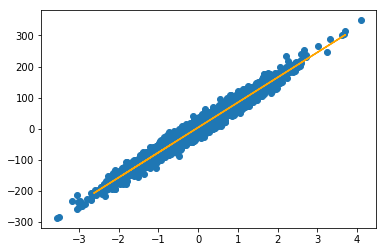

In [150]:
plt.scatter(x,y)
plt.plot(z, hypothesis(z, final_theta), color = 'orange')

plt.show()



In [151]:
arr = np.array(hypothesis(z, final_theta))
print(arr.shape)

(1250, 1)


In [153]:
#pd.DataFrame(arr).to_csv("submission_hardwork_pays_off.csv", encoding = 'utf-8', index = False)
#df = pd.read_csv('submission_hardwork_pays_off.csv')
df = pd.DataFrame(arr)
df.columns = ['y']
df.to_csv('submission_hardwork_pays_off.csv', encoding = 'utf-8', index = False)